## Analyse Neg

In [40]:
import numpy as np
import pandas as pd
import plotly.express as px
from datetime import datetime, timedelta
import seaborn as sns
from pandas.tseries.offsets import DateOffset
import edhec_risk_kit as erk

In [41]:
# Name control files as well as relevant columns to process data
out_col_N = ['Date','Ticker','z_TR_12-1', 'z_CECP', 'z_best_eps_chg','z_rec_chg','z_tp_chg','z_fcf_me','z_fcf_at','z_BM','Neg_Sel']
control_N = pd.read_csv(r'C:\Users\B420615.STANLIB\Neg_Sel_Control.csv')
control_N = control_N['Files'].tolist()

In [ ]:
# create file of negative selection alpha scores for all periods and output
# Using improved append function that ensures proper date sorting and column matching
Neg_Sel_Score = erk.append_csv_files_by_date(
    file_list=control_N,
    file_path_template=r'C:\Users\B420615.STANLIB\OneDrive - Standard Bank\Documents\data\Neg_Sel\{}.csv',
    output_columns=out_col_N,
    date_column='Date',
    date_format='%Y%m%d'
)

In [43]:
Neg_Sel_Score.head()

,Date,Ticker,z_TR_12-1,z_CECP,z_best_eps_chg,z_rec_chg,z_tp_chg,z_fcf_me,z_fcf_at,z_BM,Neg_Sel
0,2005-10-31,AU US Equity,-0.845714,-0.239628,0.0,-0.204006,-1.099655e-17,-8.381070e-17,2.288349e-16,7.466192,0.772106
1,2005-10-31,EMI SJ Equity,0.565044,-0.102787,0.0,1.782752,-1.099655e-17,-8.381070e-17,2.288349e-16,1.595736,0.480093
2,2005-10-31,CML SJ Equity,0.238498,-0.095874,0.0,1.324270,-1.099655e-17,-8.381070e-17,2.288349e-16,1.544090,0.376373
3,2005-10-31,ELH SJ Equity,-0.290781,-0.067515,0.0,1.196913,-1.099655e-17,-1.639211e-01,-4.878081e-01,1.389151,0.197005
4,2005-10-31,HYP SJ Equity,0.601854,-0.092584,0.0,1.731810,-1.099655e-17,-8.381070e-17,2.288349e-16,1.139528,0.422576


In [44]:
Neg_Sel_Score = Neg_Sel_Score.sort_values(by=['Date', 'Neg_Sel'], ascending=[True, False])

In [45]:
def get_month_data(df: pd.DataFrame, month_end_date_str: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Filters Neg_Sel_Score by a specific month-end date and returns that month's data

    Args:
        df (pd.DataFrame): The input DataFrame containing 'Date' and 'Neg_Sel' columns.
        month_end_date_str (str): The month-end date in 'YYYY-MM-DD' format.

    Returns:
        dataframe of month's data
    """
    # 1. Ensure the 'Date' column is in datetime format
    # This is a good practice to ensure date comparisons work correctly.
    try:
        df['Date'] = pd.to_datetime(df['Date'])
    except KeyError:
        print("Error: DataFrame must contain a 'Date' column.")
        return pd.DataFrame(), pd.DataFrame()
    except Exception as e:
        print(f"Error converting 'Date' column to datetime: {e}")
        return pd.DataFrame(), pd.DataFrame()

    # Convert the input date string to a datetime object for filtering
    try:
        target_date = datetime.strptime(month_end_date_str, '%Y-%m-%d').date()
    except ValueError:
        print(f"Error: Invalid date format '{month_end_date_str}'. Please use 'YYYY-MM-DD'.")
        return pd.DataFrame(), pd.DataFrame()

    # 2. Filter the DataFrame for the specific month-end date
    Neg_Sel_Month = df[df['Date'].dt.date == target_date].copy()

    # Check if any data was found for the specified date
    if Neg_Sel_Month.empty:
        print(f"No data found for the date: {month_end_date_str}")
        return pd.DataFrame(), pd.DataFrame()

    # 3. Sort the filtered DataFrame by 'Neg_Sel'
    # We sort by 'Neg_Sel' in ascending order to find the bottom values first.
    # The 'reset_index' is used to create a new, clean index for the result.
    Neg_Sel_Month = Neg_Sel_Month.sort_values(by='Neg_Sel', ascending=False).reset_index(drop=True)

    return Neg_Sel_Month

In [46]:
Neg_Sel_Month = get_month_data(Neg_Sel_Score,'2025-08-31')

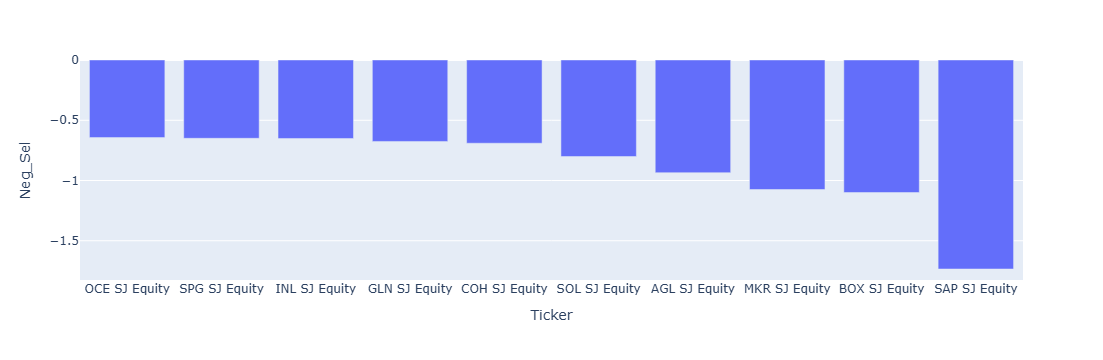

In [57]:
Top_10 = Neg_Sel_Month[0:10]
Bottom_10 = Neg_Sel_Month[-10:]
factor_items = out_col_N[-9:-1]
fig = px.bar(Bottom_10, x='Ticker', y='Neg_Sel')
fig.show()

### Stacked Bar Chart

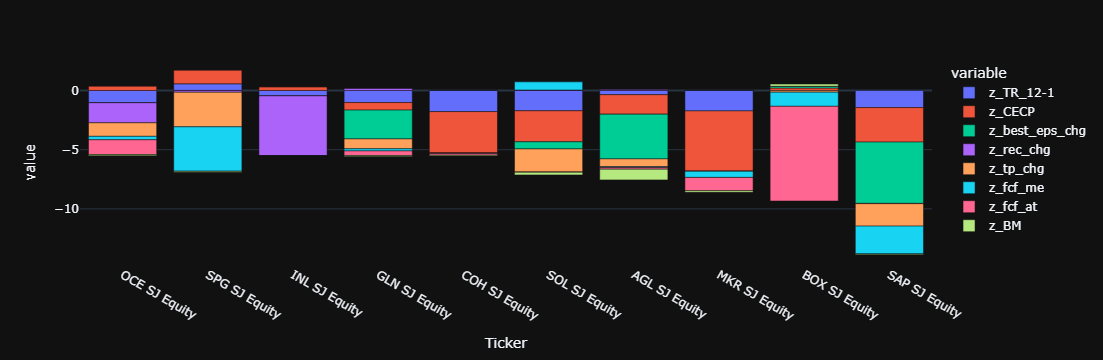

In [61]:
#melt the dataframe for chart
Bottom_10_melt = Bottom_10.melt(id_vars="Ticker",value_vars=factor_items)

#Build a stacked bar chart
fig = px.bar(Bottom_10_melt, x="Ticker", y="value", template='plotly_dark', color="variable")
fig.show()

In [51]:
import pandas as pd

# Create a sample DataFrame in a "wide" format
data = {'City': ['London', 'Paris', 'Tokyo'],
        'Jan': [50, 60, 70],
        'Feb': [55, 65, 75]}
df = pd.DataFrame(data)

print("Original DataFrame (Wide Format):")
print(df)

# Use pd.melt() to unpivot the DataFrame
# 'id_vars' are the columns to keep as identifiers
# 'value_vars' are the columns to unpivot
melted_df = pd.melt(df, id_vars=['City'], value_vars=['Jan', 'Feb'], var_name='Month', value_name='Temperature')

print("\n DataFrame (Long Format):")
print(melted_df)

Original DataFrame (Wide Format):
     City  Jan  Feb
0  London   50   55
1   Paris   60   65
2   Tokyo   70   75

 DataFrame (Long Format):
     City Month  Temperature
0  London   Jan           50
1   Paris   Jan           60
2   Tokyo   Jan           70
3  London   Feb           55
4   Paris   Feb           65
5   Tokyo   Feb           75
